In [1]:
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
from scipy.cluster.hierarchy import linkage, fcluster
from collections import defaultdict
from sklearn.cluster import AgglomerativeClustering

# Define the documents and query
docs = [
    "Since OpenAI released its blockbuster bot ChatGPT in November, users have casually experimented with the tool, with even Insider reporters trying to simulate news stories or message potential dates.To older millennials who grew up with IRC chat rooms — a text instant message system — the personal tone of conversations with the bot can evoke the experience of chatting online. But ChatGPT, the latest in technology known as 'large language model tools,' doesn't speak with sentience and doesn't 'think' the way people do.",
    "Other tech companies like Google and Meta have developed their own large language model tools, which use programs that take in human prompts and devise sophisticated responses. OpenAI, in a revolutionary move, also created a user interface that is letting the general public experiment with it directly. Some recent efforts to use chat bots for real-world services have proved troubling — with odd results. The mental health company Koko came under fire this month after its founder wrote about how the company used GPT-3 in an experiment to reply to users.",
    "The founder of the controversial DoNotPay service, which claims its GPT-3-driven chat bot helps users resolve customer service disputes, also said an AI 'lawyer' would advise defendants in actual courtroom traffic cases in real time, though he later walked that back over concerns about its risks. Chat GPT is an AI Chatbot developed by Open AI. The chatbot has a language-based model that the developer fine-tunes for human interaction in a conversational manner. Effectively it’s a simulated chatbot primarily designed for customer service; people use it for various other purposes too though. These range from writing essays to drafting business plans, to generating code. But what is it and what can it really do?",
    "Chat GPT is an AI chatbot auto-generative system created by Open AI for online customer care. It is a pre-trained generative chat, which makes use of (NLP) Natural Language Processing. The source of its data is textbooks, websites, and various articles, which it uses to model its own language for responding to human interaction. The main feature of Chat GPT is generating responses like those humans would provide, in a text box. Therefore, it is suitable for chatbots, AI system conversations, and virtual assistants. However, it can also give natural answers to questions in a conversational tone and can generate stories poems and more. Moreover, it can: Write code, Write an article or blog post, Translate, Debug, Write a story/poem, Recommend chords and lyrics.",
]
query = "OpenAI chatbot chatGPT"


TF-IDF VECTORS

In [9]:
# Step 1: Convert documents to TF-IDF vectors
tfidf_vectorizer = TfidfVectorizer()
tfidf_matrix = tfidf_vectorizer.fit_transform(docs)

print("TF-IDF vectors:")
print(tfidf_matrix.toarray())

TF-IDF vectors:
[[0.         0.         0.         0.         0.         0.
  0.         0.05515526 0.         0.         0.         0.10569351
  0.         0.         0.         0.         0.10569351 0.
  0.16665995 0.         0.         0.         0.08332998 0.
  0.         0.0674628  0.         0.         0.10569351 0.05515526
  0.         0.         0.21138702 0.10569351 0.         0.
  0.         0.         0.         0.         0.         0.
  0.08332998 0.         0.         0.         0.         0.10569351
  0.         0.         0.         0.         0.         0.
  0.         0.         0.08332998 0.21138702 0.         0.
  0.         0.         0.         0.         0.10569351 0.10569351
  0.10569351 0.         0.10569351 0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.10569351 0.
  0.08332998 0.         0.         0.         0.         0.
  0.         0.         0.11031052 0.10569351 0.1056

In [10]:
print(tfidf_matrix)

  (0, 56)	0.08332997703821271
  (0, 137)	0.08332997703821271
  (0, 220)	0.105693509676896
  (0, 194)	0.105693509676896
  (0, 7)	0.05515525797775293
  (0, 170)	0.105693509676896
  (0, 179)	0.105693509676896
  (0, 57)	0.211387019353792
  (0, 203)	0.08332997703821271
  (0, 118)	0.05515525797775293
  (0, 103)	0.05515525797775293
  (0, 104)	0.08332997703821271
  (0, 11)	0.105693509676896
  (0, 101)	0.105693509676896
  (0, 186)	0.105693509676896
  (0, 106)	0.105693509676896
  (0, 22)	0.08332997703821271
  (0, 130)	0.08332997703821271
  (0, 33)	0.105693509676896
  (0, 66)	0.105693509676896
  (0, 65)	0.105693509676896
  (0, 25)	0.06746279811656011
  (0, 42)	0.08332997703821271
  (0, 128)	0.13492559623312023
  (0, 200)	0.08332997703821271
  :	:
  (3, 44)	0.06802380207978019
  (3, 5)	0.05507113034154127
  (3, 164)	0.06802380207978019
  (3, 90)	0.05507113034154127
  (3, 212)	0.05507113034154127
  (3, 223)	0.11014226068308254
  (3, 136)	0.06802380207978019
  (3, 109)	0.06802380207978019
  (3, 7)	0

COSINE SIMILARITY

In [3]:
# Step 2: Calculate cosine similarity between document vectors
cosine_similarities = cosine_similarity(tfidf_matrix)
print(cosine_similarities)

[[1.         0.23267147 0.1556923  0.16570101]
 [0.23267147 1.         0.23868822 0.21854322]
 [0.1556923  0.23868822 1.         0.38084356]
 [0.16570101 0.21854322 0.38084356 1.        ]]


AGGLOMERATIVE CLUSTERING

In [4]:
# Step 3: Perform hierarchical agglomerative clustering
agg_clustering = AgglomerativeClustering(n_clusters=2, affinity='cosine', linkage='complete')
agg_clustering
agg_clustering.fit(cosine_similarities)


AgglomerativeClustering(affinity='cosine', linkage='complete')

In [5]:
# Step 4: Print cluster assignments
for doc_idx, cluster_label in enumerate(agg_clustering.labels_):
    print(f"Document {doc_idx+1} assigned to cluster {cluster_label+1}")

Document 1 assigned to cluster 2
Document 2 assigned to cluster 1
Document 3 assigned to cluster 1
Document 4 assigned to cluster 1


VISUALIZATION

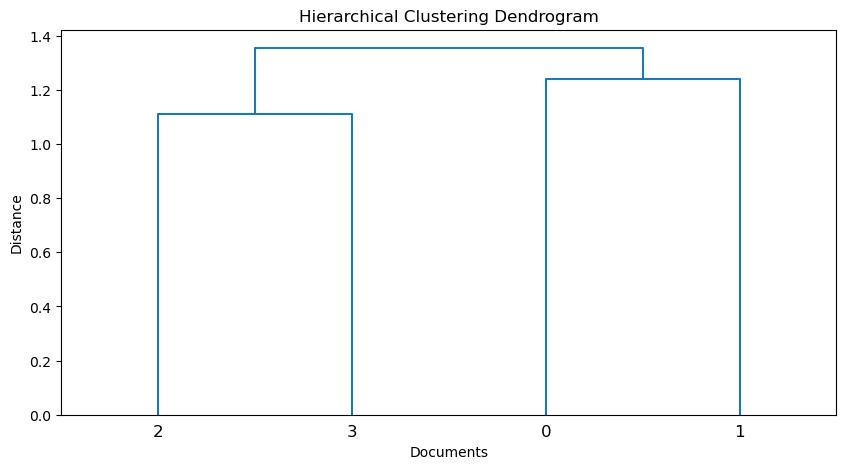

In [6]:
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage

# Perform hierarchical clustering on the data
Z = linkage(tfidf_matrix.toarray(), 'ward')

# Plot the dendrogram
plt.figure(figsize=(10, 5))
dendrogram(Z)
plt.xlabel('Documents')
plt.ylabel('Distance')
plt.title('Hierarchical Clustering Dendrogram')
plt.show()

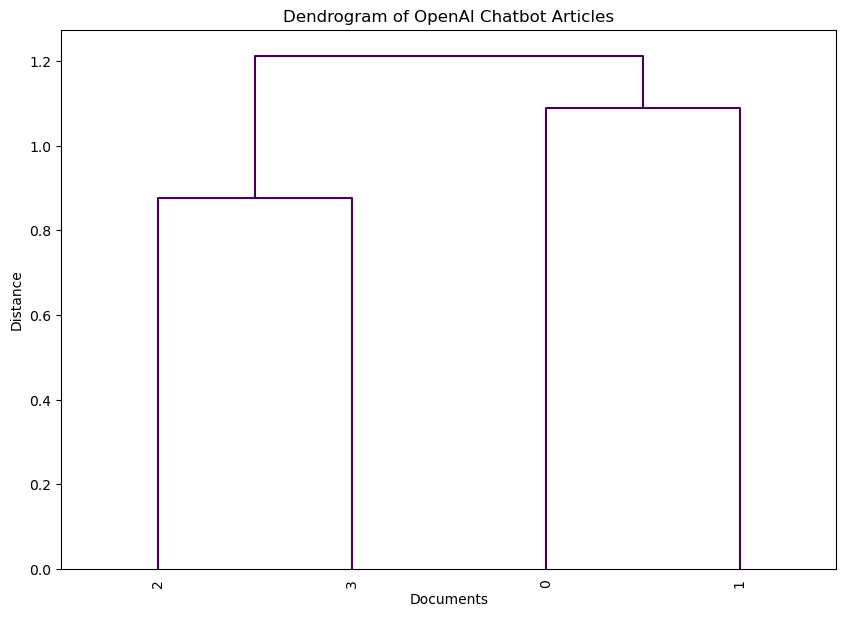

In [7]:
import matplotlib.pyplot as plt
import scipy.cluster.hierarchy as shc

# Define the color map
cmap = plt.cm.get_cmap('viridis', 2)

# Plot the dendrogram with colors
plt.figure(figsize=(10, 7))
dend = shc.dendrogram(shc.linkage(cosine_similarities, method='complete'), 
                      leaf_font_size=10, 
                      leaf_rotation=90, 
                      color_threshold=0.5,
                      above_threshold_color=cmap(0),
                      orientation='top')
plt.title('Dendrogram of OpenAI Chatbot Articles')
plt.xlabel('Documents')
plt.ylabel('Distance')
plt.show()





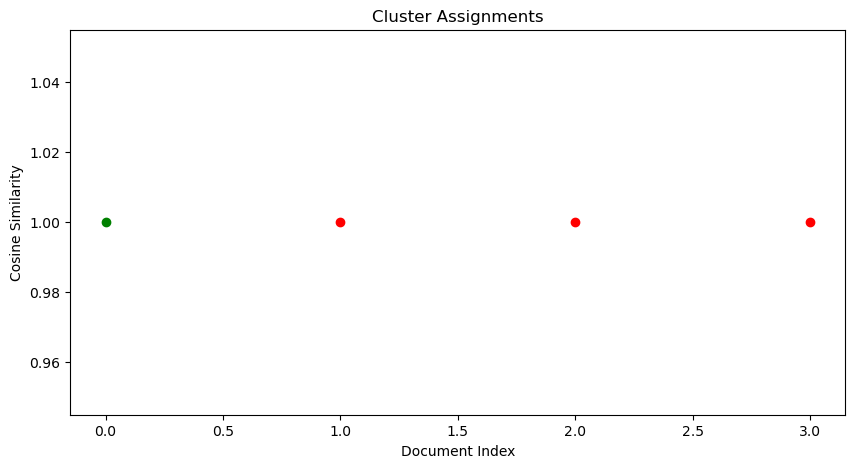

In [11]:
from collections import defaultdict
# Dictionary to store cluster indices
cluster_indices = defaultdict(list)

# Populate the dictionary with document indices
for doc_idx, cluster_label in enumerate(agg_clustering.labels_):
    cluster_indices[cluster_label].append(doc_idx)

# Define colors for the plot
colors = ['r', 'g', 'b', 'y', 'm', 'c']

# Plot the clusters
plt.figure(figsize=(10, 5))
plt.title('Cluster Assignments')
plt.xlabel('Document Index')
plt.ylabel('Cosine Similarity')
for cluster_label, doc_indices in cluster_indices.items():
    color = colors[cluster_label % len(colors)]
    for doc_idx in doc_indices:
        plt.scatter(doc_idx, cosine_similarities[doc_idx][doc_idx], c=color)
plt.show()


[[ 0.65488934 -0.46441843]
 [ 0.27136384  0.7072514 ]
 [-0.46486823 -0.05188781]
 [-0.46138496 -0.19094517]]


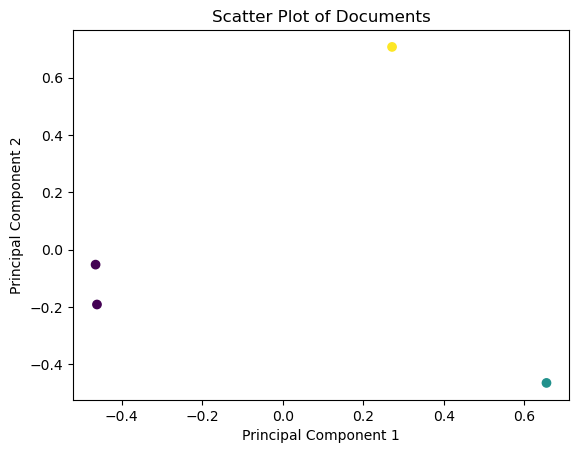

In [19]:
from sklearn.decomposition import PCA

# Perform PCA on TF-IDF matrix
pca = PCA(n_components=2)
tfidf_pca = pca.fit_transform(tfidf_matrix.toarray())

print(tfidf_pca)

# Plot scatter plot
plt.scatter(tfidf_pca[:, 0], tfidf_pca[:, 1], c=agg_clustering.labels_, cmap='viridis')
plt.title('Scatter Plot of Documents')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()


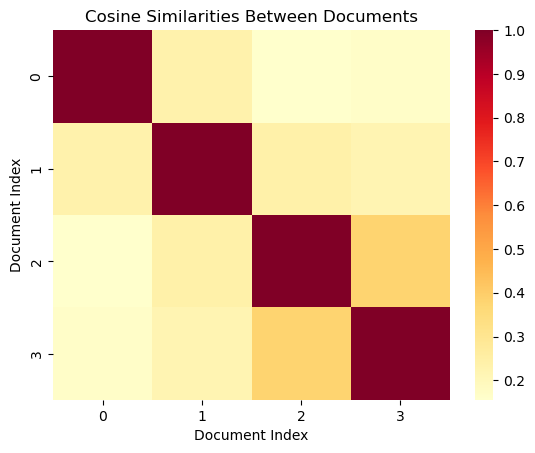

In [14]:
import seaborn as sns

# Plot heatmap of cosine similarities
sns.heatmap(cosine_similarities, cmap='YlOrRd')
plt.title('Cosine Similarities Between Documents')
plt.xlabel('Document Index')
plt.ylabel('Document Index')
plt.show()

[0.1761117872134358, 0.1932603088524532]


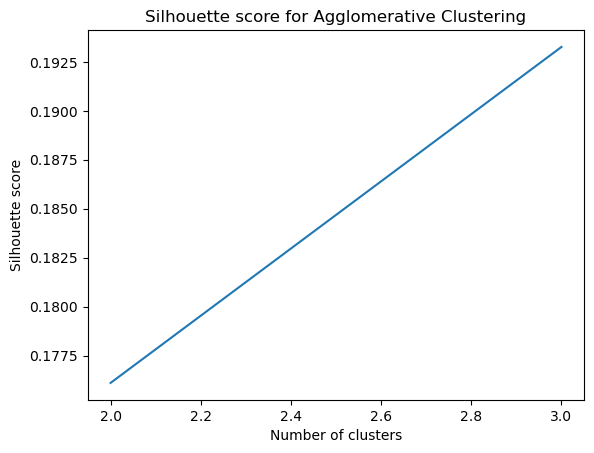

In [18]:
from sklearn.metrics import silhouette_score

# Calculate Silhouette score for different number of clusters
sil_scores = []
for n_clusters in range(2, len(docs)):
    agg_clustering = AgglomerativeClustering(n_clusters=n_clusters, affinity='cosine', linkage='complete')
    cluster_labels = agg_clustering.fit_predict(cosine_similarities)
    sil_score = silhouette_score(cosine_similarities, cluster_labels, metric='cosine')
    sil_scores.append(sil_score)
print(sil_scores)   

# Plot Silhouette scores
plt.plot(range(2, len(docs)), sil_scores)
plt.title('Silhouette score for Agglomerative Clustering')
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette score')
plt.show()
